# 📌 Embedding Text and Visualizing in 3D

## What is an Embedding?

An **embedding** is a way to convert text (or any data like images, audio) into numbers—specifically, a vector of floating-point numbers. These vectors capture the **meaning** or **semantics** of the text.

For example, the sentences:
- “I love pizza.”
- “Pizza is my favorite food.”

...may have different words but very **similar meanings**, so their embeddings will be **close together** in vector space.

---

## Why are Embeddings Important?

Text data is not naturally understandable by machines. Computers understand numbers. Embeddings allow us to:

- Convert unstructured text into structured numerical data.
- Compare the similarity between pieces of text.
- Use math to cluster, search, or classify text.

---

## How Are Embeddings Used in LLMs and Vector Databases?

### 🔹 In LLMs (Large Language Models)
LLMs like GPT or BERT use embeddings internally:
- They convert words/sentences into embeddings as the **input**.
- Then, they process these embeddings to generate new text.
- They also produce output embeddings for the generated tokens.

Embeddings help LLMs **understand context, meaning, and relationships between words**.

### 🔹 In Vector Databases (e.g., FAISS, Milvus, Pinecone)
Vector databases store embeddings and let you:
- Search for the most similar vectors (text, images, etc.)
- Perform semantic search: **“Find me texts similar in meaning to this.”**
- Power RAG (Retrieval-Augmented Generation) systems.

---

## What You’ll Do in This Notebook

We will:
- Use the `sentence-transformers` library to embed some example texts.
- Use **PCA** to reduce the embedding dimensions from 384D to 3D (for visualization).
- Plot the 3D embeddings with `matplotlib` to **see how meaning is captured visually**.


In [ ]:
# Install required packages
%pip install sentence-transformers matplotlib scikit-learn


In [59]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [60]:
# Sample text data
texts = [
    "Artificial intelligence is the future of technology.",
    "Machine learning improves applications using data.",
    "I love pizza on weekends!",
    "The universe is vast and mysterious.",
    "Natural language processing deals with text and language."
]


## Step 1: Converting Text to Embeddings

- We'll use a **pre-trained model** (`all-MiniLM-L6-v2`) from the Sentence Transformers library.
- This model turns each sentence into a **384-dimensional vector** that captures the sentence's meaning.
- So if you have `N` sentences, you'll get an Nx384 matrix.


In [61]:
# Load a pre-trained embedding model.
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert texts to embeddings.
embeddings = model.encode(texts)
print("Shape of embeddings:", embeddings.shape)
print(embeddings)


Shape of embeddings: (5, 384)
[[-0.03636331  0.01251594  0.05257956 ...  0.03803717  0.04927756
  -0.04570623]
 [ 0.02534793 -0.00967484  0.06623027 ...  0.01265042 -0.02963034
  -0.01012791]
 [-0.08340798  0.0115193   0.06424351 ...  0.02237885 -0.04024963
  -0.07236979]
 [ 0.04170427 -0.00295268  0.00226346 ... -0.05025115  0.00229798
  -0.00072859]
 [ 0.0624655   0.03321961  0.06379361 ...  0.06067356  0.05984202
  -0.00918465]]


### Step 2: Reducing Embeddings to 3D for Visualization

- Each embedding is a **384-dimensional vector** — impossible to visualize directly.
- We use **PCA (Principal Component Analysis)** to reduce each vector to **3 dimensions**.
- This allows us to **plot them in 3D space**, while preserving as much information as possible.


In [62]:
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings)
print("Reduced shape:\n\n", reduced_embeddings)


Reduced shape:

 [[-0.28914642  0.15512909 -0.35812485]
 [-0.32817635 -0.25995445 -0.41855663]
 [ 0.8648637  -0.41354883  0.02438883]
 [ 0.24396665  0.7777192   0.14650893]
 [-0.49150753 -0.25934505  0.60578376]]


### Step 3: Plotting the 3D Embeddings


X : [-0.28914642 -0.32817635  0.8648637   0.24396665 -0.49150753]
Y : [ 0.15512909 -0.25995445 -0.41354883  0.7777192  -0.25934505]
Z : [-0.35812485 -0.41855663  0.02438883  0.14650893  0.60578376]


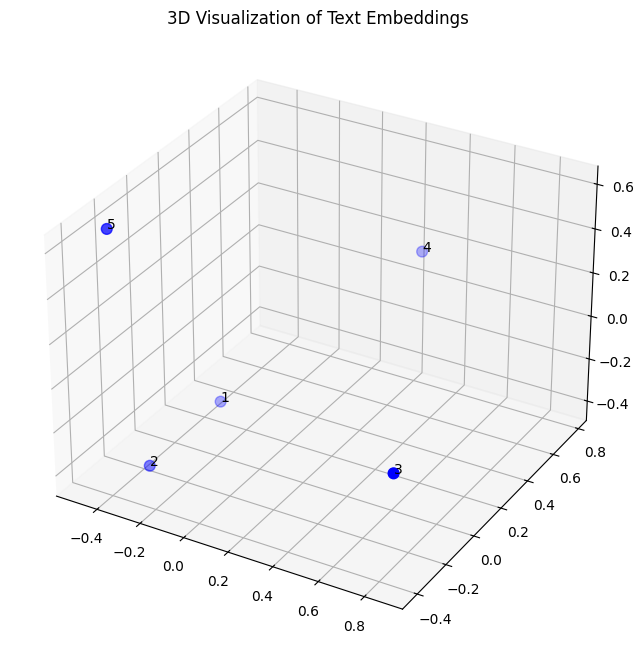

In [63]:
# Plot the 3D embeddings.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the reduced embeddings.
x, y, z = reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2]
ax.scatter(x, y, z, c='blue', s=60)

print("X :", x)
print("Y :", y)
print("Z :", z)

# Annotate points with text index
for i, txt in enumerate(texts):
    ax.text(x[i], y[i], z[i], f"{i+1}", fontsize=10)

ax.set_title("3D Visualization of Text Embeddings")
plt.show()


## ✅ Summary: What Did We Learn?

- We took natural language text and turned it into meaningful numerical vectors (embeddings).
- These embeddings let us **measure semantic similarity** between texts.
- We reduced high-dimensional data (384D) into 3D using PCA for visualization.
- Embeddings are the **foundation of LLMs, semantic search, and AI applications** like chatbots, search engines, and recommendation systems.

👉 If you understand embeddings, you're one step closer to understanding how AI truly "understands" language!
